In [ ]:
import numpy as np 
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

## **Import Datasets**

In [ ]:
data=pd.read_csv('abalone.csv')
df=data.copy()

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# Missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

##**Data Preparation**

In [ ]:
df = df.rename(columns={"Whole weight": "Whole Weight","Shucked weight":"Shucked Weight",
                        "Viscera weight":"Viscera Weight","Shell weight":"Shell Weight"})

In [ ]:
categorical = ['Sex']

for cat in categorical:
    df.loc[:, [cat]] = df[cat].astype("category").cat.codes

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


0 : Female

1  : Infant

2  : Male

The researchers believed adding **1.5** to the ring count is a reasonable approximation of the abalones age. This complex method increases the cost and limits its popularity. Hence, researchers are interested in relating abalone age to variables like length, height and weight of the animal.

In [ ]:
 df['Age'] = df['Rings']+1.5
 df.drop('Rings', axis = 1, inplace = True)

##**What is The Most Accurate Model to Predict The Age of Abalone ?**

In [ ]:
X = df.drop('Age', axis = 1)
Y = df['Age']
X = StandardScaler().fit_transform(X)

In [ ]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

**Linear Regression Model**

In [ ]:
# Data Modelling Using Multi Linear Regression
lr = LinearRegression()

# Fit
lr_fit = lr.fit(X_train,Y_train)

In [ ]:
#Dataset Prediction
Y_Predict = lr_fit.predict(X_test)
print(Y_Predict.round(1))

[13.2 11.6 15.5 ...  9.  13.6  9.8]


**Random Forest Regression Model**

In [ ]:
# Data Modelling Using Random Forest Regression
rf = RandomForestRegressor(n_estimators=4, max_depth=10, random_state=42)

# Fit
rf_fit = rf.fit(X_train,Y_train)

In [ ]:
#Dataset Prediction
Y_Predict2 = rf_fit.predict(X_test)
print(Y_Predict2.round(1))

[13.4 11.4 17.1 ... 10.  13.3 11. ]


**Decision Tree Regression Model**

In [ ]:
# Data Modelling Using Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)

# Fit
dt_fit = dt.fit(X_train, Y_train)

In [ ]:
#Dataset Prediction
Y_Predict3 = dt_fit.predict(X_test)
print(Y_Predict3.round(1))

[17.5 13.5 13.5 ... 11.5 16.5  9.5]


**Model Comparison**

In [ ]:
models = [('Linear Regression', Y_Predict),('Random Forest Regression', Y_Predict2), ('Decision Tree Regression', Y_Predict3)]

for model in models:
    print(f'{model[0]}\n')
    print('MAE      : %f'% mean_absolute_error(Y_test,model[1]))
    print('MSE      : %f'% mean_squared_error(Y_test,model[1]))
    print('RMSE     : %f'% np.sqrt(mean_squared_error(Y_test, model[1])))   
    print('R-Square : %f\n' % r2_score(Y_test, model[1]))

Linear Regression

MAE      : 1.618718
MSE      : 4.926431
RMSE     : 2.219557
R-Square : 0.514855

Random Forest Regression

MAE      : 1.651170
MSE      : 5.585589
RMSE     : 2.363385
R-Square : 0.449943

Decision Tree Regression

MAE      : 2.086124
MSE      : 9.145136
RMSE     : 3.024093
R-Square : 0.099406



In [ ]:
Scoring = ['MAE', 'MSE', 'RMSE','R-Square']

fig = go.Figure()
fig.add_trace(go.Bar(name='Linear Regression', x=Scoring, y=[1.618718, 4.926431, 2.219557, 0.514855], 
                     marker_color='olive'))
fig.add_trace(go.Bar(name='Random Forest Regression', x=Scoring, y=[1.651170, 5.585589, 2.363385, 0.449943], 
                     marker_color='olivedrab'))
fig.add_trace(go.Bar(name='Decision Tree Regression', x=Scoring, y=[2.086124, 9.145136, 3.024093, 0.099406], 
                     marker_color='darkseagreen'))

fig.update_layout(barmode='group',title_text="Comparison of Predicted Models")
fig.show()

After we compare the value of MAE, MSE, RMSE and R-Square from all of the methods, we can conclude that the best model for

**Predicting The Age of Abalone** is using **Linear Regression**. 

As we can see that linear regression has the smallest value of MAE, MSE and RMSE and the biggest value of R-Square of all the methods that we use.

In [ ]:
print(lr_fit.intercept_.round(3))
print(lr_fit.coef_.round(3))

11.458
[ 0.065 -0.072  1.25   0.467  4.994 -4.872 -1.077  1.089]


**The Regression Model**

Age = 11.458 + 0.065 Sex - 0.072 Length + 1.25 Diameter + 0.467 Height + 4.994 Whole Weight - 4.872 Shucked Weight - 1.077 Viscera Weight  + 1.089 Shell Weight

***Without Outlier***

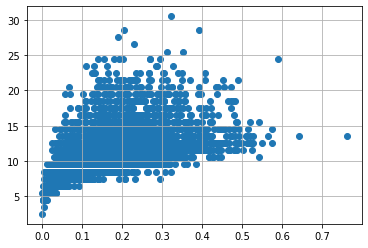

In [ ]:
var = 'Viscera Weight'
plt.scatter(x = df[var], y = df['Age'],)
plt.grid(True)

In [ ]:
# Outliers Removal
df.drop(df[(df['Viscera Weight'] > 0.5) & (df['Age'] < 25)].index, inplace=True)
df.drop(df[(df['Viscera Weight'] < 0.5) & (df['Age'] > 25)].index, inplace=True)

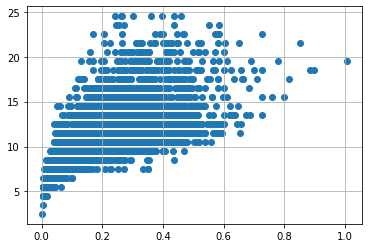

In [ ]:
var = 'Shell Weight'
plt.scatter(x = df[var], y = df['Age'],)
plt.grid(True)

In [ ]:
# Outliers Removal
df.drop(df[(df['Shell Weight'] > 0.6) & (df['Age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell Weight'] < 0.8) & (df['Age'] > 25)].index, inplace=True)

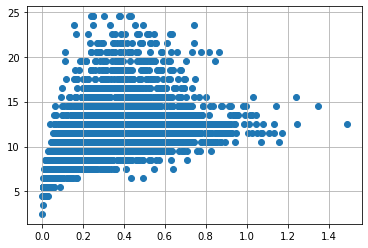

In [ ]:
var = 'Shucked Weight'
plt.scatter(x = df[var], y = df['Age'],)
plt.grid(True)

In [ ]:
# Outliers Removal
df.drop(df[(df['Shucked Weight'] >= 1) & (df['Age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked Weight'] < 1) & (df['Age'] > 20)].index, inplace=True)

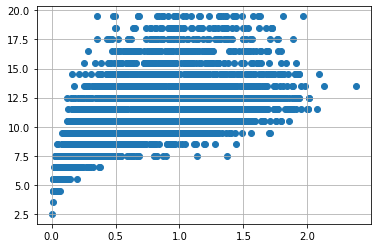

In [ ]:
var = 'Whole Weight'
plt.scatter(x = df[var], y = df['Age'],)
plt.grid(True)

In [ ]:
# Outliers Removal
df.drop(df[(df['Whole Weight'] >= 2) & (df['Age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole Weight'] < 2) & (df['Age'] > 25)].index, inplace=True)

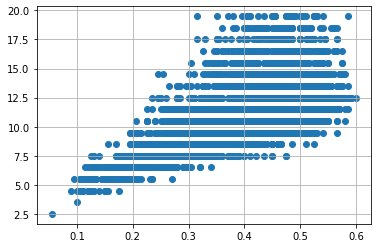

In [ ]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['Age'],)
plt.grid(True)

In [ ]:
# Outliers Removal
df.drop(df[(df['Diameter'] < 0.1) & (df['Age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter'] < 0.6) & (df['Age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter'] >= 0.6) & (df['Age'] < 25)].index, inplace=True)

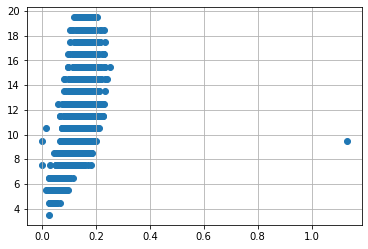

In [ ]:
var = 'Height'
plt.scatter(x = df[var], y = df['Age'],)
plt.grid(True)

In [ ]:
# Outliers Removal
df.drop(df[(df['Height'] > 0.4) & (df['Age'] < 15)].index, inplace=True)
df.drop(df[(df['Height'] < 0.4) & (df['Age'] > 25)].index, inplace=True)

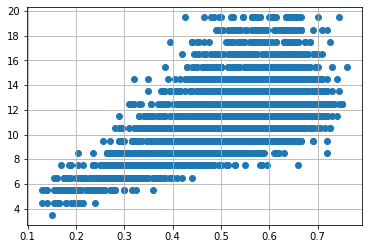

In [ ]:
var = 'Length'
plt.scatter(x = df[var], y = df['Age'],)
plt.grid(True)

In [ ]:
# Outliers Removal
df.drop(df[(df['Length'] < 0.1) & (df['Age'] < 5)].index, inplace=True)
df.drop(df[(df['Length'] < 0.8) & (df['Age'] > 25)].index, inplace=True)
df.drop(df[(df['Length'] >= 0.8) & (df['Age'] > 25)].index, inplace=True)

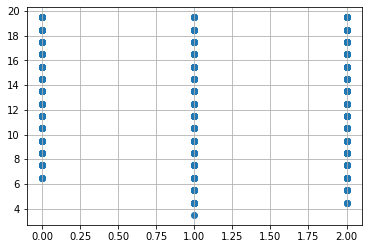

In [ ]:
var = 'Sex'
plt.scatter(x = df[var], y = df['Age'],)
plt.grid(True)

In [ ]:
# Outliers Removal
df.drop(df[(df['Sex']> 2) & (df['Age'] < 25)].index, inplace=True)
df.drop(df[(df['Sex']<= 2) & (df['Age'] > 25)].index, inplace=True)

Predicting Model Without Outlier

In [ ]:
X = df.drop('Age', axis = 1)
Y = df['Age']
X = StandardScaler().fit_transform(X)

In [ ]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

**Linear Regression Model**

In [ ]:
# Data Modelling Using Multi Linear Regression
lr = LinearRegression()

# Fit
lr_fit = lr.fit(X_train,Y_train)

In [ ]:
#Dataset Prediction
Y_Predict = lr_fit.predict(X_test)
print(Y_Predict.round(1))

[10.8 12.3 14.6 ... 11.3 14.  12.4]


**Random Forest Regression Model**

In [ ]:
# Data Modelling Using Random Forest Regression
rf = RandomForestRegressor(n_estimators=4, max_depth=10, random_state=42)

# Fit
rf_fit = rf.fit(X_train,Y_train)

In [ ]:
#Dataset Prediction
Y_Predict2 = rf_fit.predict(X_test)
print(Y_Predict2.round(1))

[ 9.9 13.4 13.5 ...  9.9 13.4 11.7]


**Decision Tree Regression Model**

In [ ]:
# Data Modelling Using Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)

# Fit
dt_fit = dt.fit(X_train, Y_train)

In [ ]:
#Dataset Prediction
Y_Predict3 = dt_fit.predict(X_test)
print(Y_Predict3.round(1))

[10.5 16.5 10.5 ...  9.5 15.5 11.5]


**Model Comparison**

In [ ]:
models = [('Linear Regression', Y_Predict),('Random Forest Regression', Y_Predict2), ('Decision Tree Regression', Y_Predict3)]

for model in models:
    print(f'{model[0]}\n')
    print('MAE      : %f'% mean_absolute_error(Y_test,model[1]))
    print('MSE      : %f'% mean_squared_error(Y_test,model[1]))
    print('RMSE     : %f'% np.sqrt(mean_squared_error(Y_test, model[1])))   
    print('R-Square : %f\n' % r2_score(Y_test, model[1]))

Linear Regression

MAE      : 1.479775
MSE      : 3.920200
RMSE     : 1.979949
R-Square : 0.491635

Random Forest Regression

MAE      : 1.539986
MSE      : 4.559642
RMSE     : 2.135332
R-Square : 0.408713

Decision Tree Regression

MAE      : 1.860485
MSE      : 6.737678
RMSE     : 2.595704
R-Square : 0.126268



In [ ]:
Scoring = ['MAE', 'MSE', 'RMSE','R-Square']

fig = go.Figure()
fig.add_trace(go.Bar(name='Linear Regression', x=Scoring, y=[1.479775, 3.920200, 1.979949, 0.491635], 
                     marker_color='olive'))
fig.add_trace(go.Bar(name='Random Forest Regression', x=Scoring, y=[1.539986, 4.559642, 2.135332, 0.408713], 
                     marker_color='olivedrab'))
fig.add_trace(go.Bar(name='Decision Tree Regression', x=Scoring, y=[1.860485, 6.737678, 2.5957043, 0.126268], 
                     marker_color='darkseagreen'))

fig.update_layout(barmode='group',title_text="Comparison of Predicted Models Without Outlier")
fig.show()

After we compare the value of MAE, MSE, RMSE and R-Square from all of the methods, we can conclude that the best model for

**Predicting The Age of Abalone Without Outlier** is using **Linear Regression**. 

As we can see that linear regression has the smallest value of MAE, MSE and RMSE and the biggest value of R-Square of all the methods that we use.

In [ ]:
print(lr_fit.intercept_.round(3))
print(lr_fit.coef_.round(3))

11.133
[ 0.047 -0.356  1.304  0.8    2.796 -3.305 -0.594  1.018]


**The Regression Model**

Age = 11.133 + 0.047 Sex - 0.356 Length + 1.304 Diameter + 0.8 Height + 2.796 Whole Weight - 3.305 Shucked Weight - 0.594 Viscera Weight  + 1.018 Shell Weight